In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


1. csv 파일 읽어오기
2. info, desc
3. datetime 필드 -> 년, 월, 일, 시간
4. casual, registered 제거
5. x의 피처별 count의 관계를 막대그래프로 시각화
6. 데이터 분리
7. 모델 설정 : LinearRegression()
8. 훈련, predict,
9. matric 보기(rmse, rmsle)
* 주요 infortance값 시각화(coef_)
-------------------------------------------------------------
10. feature들을 one-hot encoding
11. RandomForestRegressor, GradientBoostingRegressor
XGBRegressor,LGBMRegressor 알고리즘 적용

In [3]:
df = pd.read_csv(r'data\bike_train.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [4]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df['year'] = pd.to_datetime(df.datetime).dt.year
df['month'] = pd.to_datetime(df.datetime).dt.month
df['day'] = pd.to_datetime(df.datetime).dt.day
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1


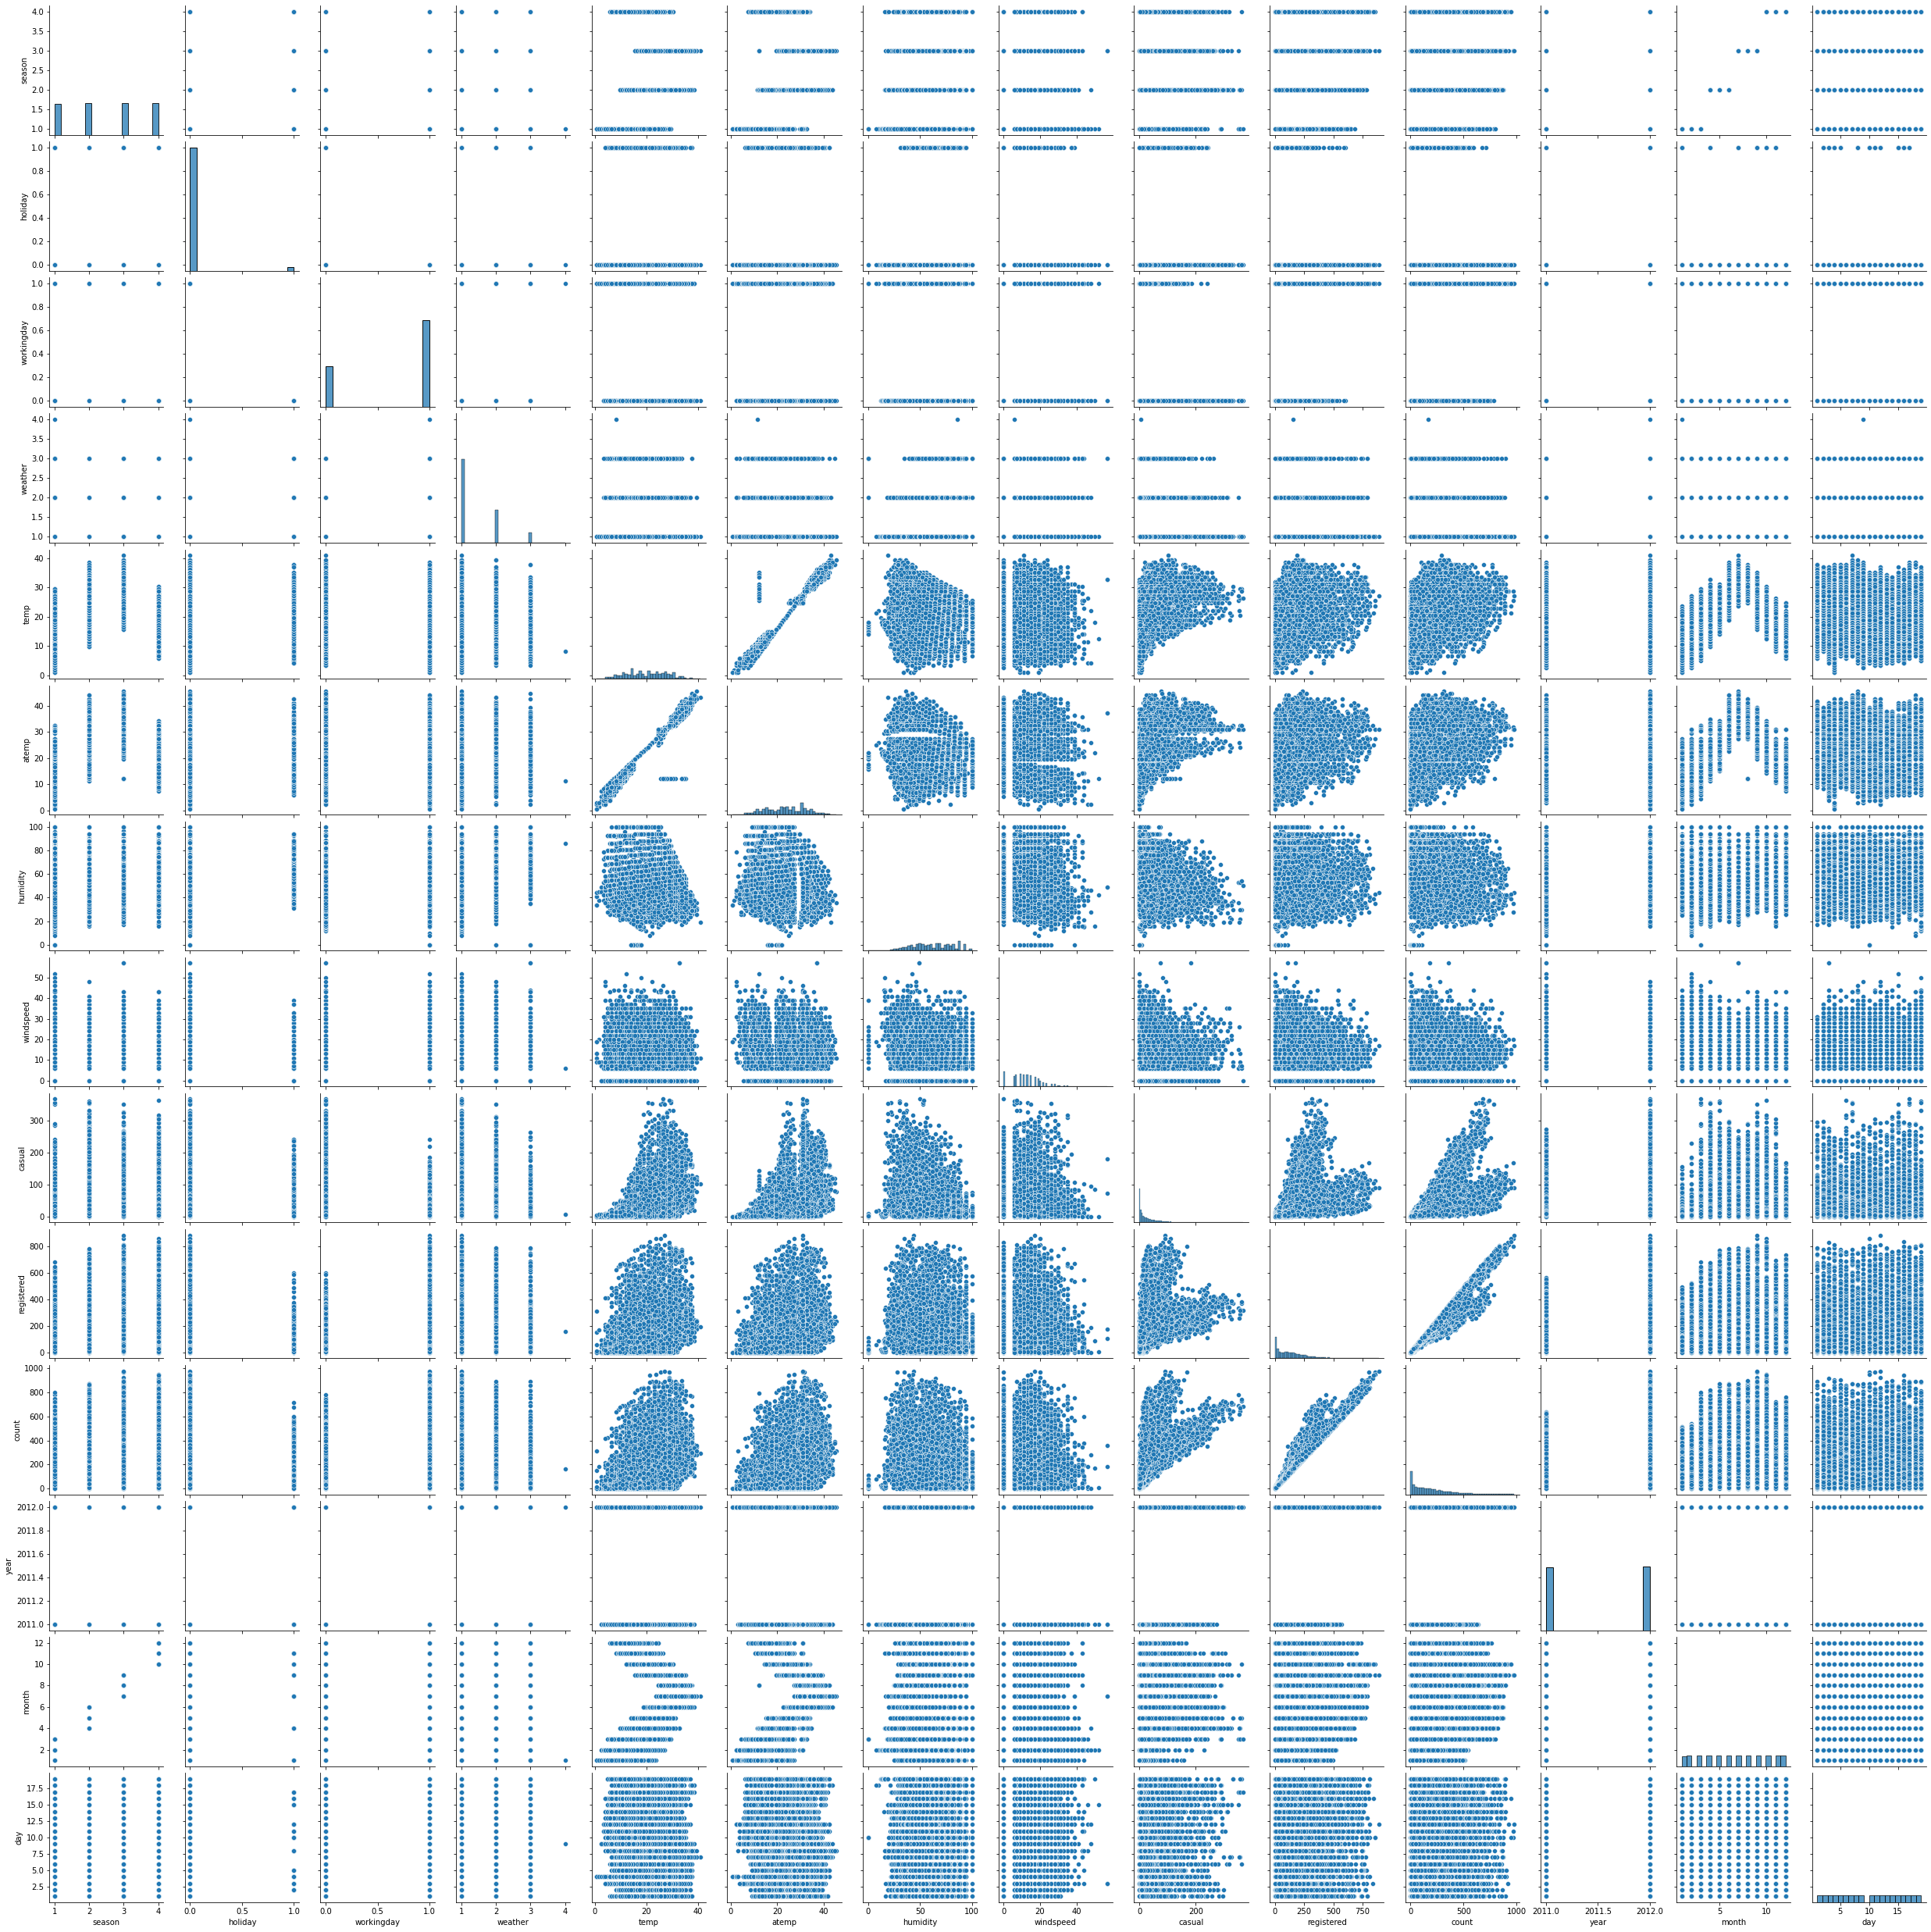

In [7]:
sns.pairplot(df)

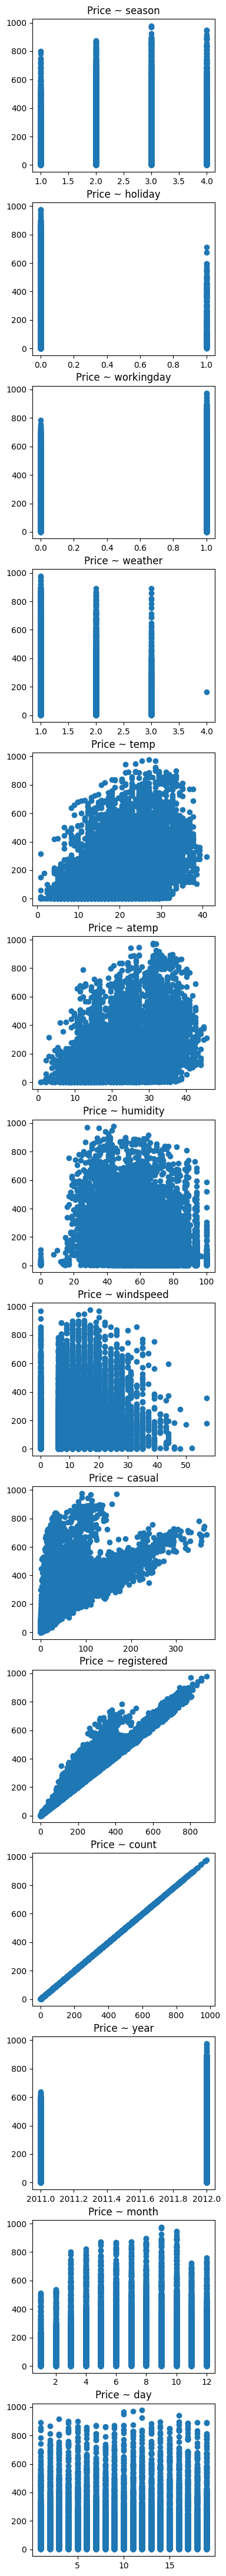

In [125]:
plt.figure(figsize=(4, 14*4))
num = 1
for col in df.columns[df.dtypes != 'object']:
    plt.subplot(14, 1, num)
    plt.scatter(df[col], df['count'])
    plt.title(f'Price ~ {col}')
    num += 1
plt.show()

In [15]:
df.corr()['count'].drop('count').sort_values(ascending=False)

registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
season        0.163439
windspeed     0.101369
day           0.019826
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

In [8]:
df_data = df[df.columns.drop(['datetime', 'casual', 'registered','count'])]
df_target = df['count']

In [9]:
df_target

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [10]:
df_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,19
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,19
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,19


In [18]:
df_target

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_data, df_target, random_state=2022, test_size=0.2
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8708, 11), (2178, 11), (8708,), (2178,))

In [21]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression().fit(X_train, y_train)
lr1.score(X_test, y_test)

0.29690867111649044

In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,lr1.predict(X_test))

22437.185889004802

In [24]:
from statsmodels.formula.api import ols

form1 = 'count~' + '+'.join(df_data.columns)
lr2 = ols(form1, df).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     445.8
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:08:56   Log-Likelihood:                -70019.
No. Observations:               10886   AIC:                         1.401e+05
Df Residuals:                   10874   BIC:                         1.402e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.591e+05   5837.368    -27.256      0.000   -1.71e+05   -1.48e+05
season       -10.4265      5.498     -1.896      0.058     -21.204       0.351
holiday       -5.5339      9.011     -0.614      0.539     -23.197      12.129
workingday    -0.7318      3.202     -0.229      0.819      -7.008       5.545
weather        4.2770      2.531      1.690      0.091      -0.685       9.239
temp           1.2694      1.103      1.151      0.250      -0.893       3.432
atemp          5.8518      1.015      5.767      0.000       3.863       7.841
humidity      -2.8953      0.090    -32.138      0.000      -3.072      -2.719
windspeed      1.0122      0.193      5.232      0.000       0.633       1.391
year          79.1643      2.902     27.281      0.000      73.476      84.852
month         11.2302      1.786      6.286      0.000       7.728      14.732
day            0.3289      0.264      1.248      0.212      -0.188       0.846
==============================================================================
Omnibus:                     1597.980   Durbin-Watson:                   0.462
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2619.485
Skew:                           0.997   Prob(JB):                         0.00
Kurtosis:                       4.341   Cond. No.                     8.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
lr2.pvalues[lr2.pvalues <= 0.05] .index

Index(['Intercept', 'atemp', 'humidity', 'windspeed', 'year', 'month'], dtype='object')

In [31]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1


In [33]:
df.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [35]:
df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [36]:
df.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [37]:
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [38]:
df .columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day'],
      dtype='object')

In [89]:
c_col = ['season', 'holiday', 'workingday', 'weather']

In [68]:
not_c = df.columns.drop(c_col).drop(['count', 'datetime', 'casual', 'registered'])

In [69]:
c_col_C = list(map(lambda x : 'C(' + x + ')', c_col))
c_col_C

['C(season)', 'C(holiday)', 'C(workingday)', 'C(weather)']

In [70]:
form1 = 'count~' + '+'.join(c_col_C) + '+' + '+'.join(not_c)
lr3 = ols(form1, df).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     345.2
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:29:07   Log-Likelihood:                -69925.
No. Observations:               10886   AIC:                         1.399e+05
Df Residuals:                   10870   BIC:                         1.400e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.539e+05   5805.609    -26.513      0.000   -1.65e+05   -1.43e+05
C(season)[T.2]       -23.3625      7.273     -3.212      0.001     -37.618      -9.106
C(season)[T.3]       -82.7333     12.229     -6.765      0.000    -106.704     -58.762
C(season)[T.4]       -21.5882     16.402     -1.316      0.188     -53.740      10.563
C(holiday)[T.1]       -6.0637      8.941     -0.678      0.498     -23.589      11.462
C(workingday)[T.1]    -2.0806      3.177     -0.655      0.513      -8.309       4.148
C(weather)[T.2]       10.6902      3.487      3.066      0.002       3.855      17.525
C(weather)[T.3]       -8.6796      5.863     -1.480      0.139     -20.173       2.814
C(weather)[T.4]      151.8741    149.274      1.017      0.309    -140.730     444.478
temp                   6.6668      1.169      5.705      0.000       4.376       8.957
atemp                  3.2913      1.025      3.212      0.001       1.283       5.300
humidity              -2.6934      0.091    -29.548      0.000      -2.872      -2.515
windspeed              0.8407      0.193      4.360      0.000       0.463       1.219
year                  76.5705      2.886     26.531      0.000      70.913      82.228
month                 10.0451      1.775      5.659      0.000       6.566      13.524
day                    0.2600      0.261      0.994      0.320      -0.253       0.773
==============================================================================
Omnibus:                     1650.253   Durbin-Watson:                   0.471
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2756.599
Skew:                           1.015   Prob(JB):                         0.00
Kurtosis:                       4.397   Cond. No.                     8.17e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
lr_pv = lr3.pvalues.drop('Intercept')
lr_pv[lr_pv <= 0.05].index

Index(['C(season)[T.2]', 'C(season)[T.3]', 'C(weather)[T.2]', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month'],
      dtype='object')

In [46]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19


In [103]:
c_col_dt = c_col + ['year', 'month', 'day']
c_col_dt

['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day']

In [104]:
not_c_dt = df.columns.drop(c_col_dt).drop(['count', 'datetime', 'casual', 'registered'])

In [105]:
df_dum = df[not_c_dt]
for col in c_col_dt:
    df_dum = pd.concat([df_dum, pd.get_dummies(df[col], prefix=col)], axis=1)
df_dum

,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,...,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19
0,9.84,14.395,81,0.0000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,9.02,13.635,80,0.0000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,9.02,13.635,80,0.0000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9.84,14.395,75,0.0000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.84,14.395,75,0.0000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
10882,14.76,17.425,57,15.0013,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
10883,13.94,15.910,61,15.0013,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
10884,13.94,17.425,61,6.0032,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    df_dum, df['count'], random_state=2022, test_size=0.3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7620, 49), (7620,), (3266, 49), (3266,))

In [107]:
lr2 = LinearRegression().fit(X_train, y_train)
lr2.score(X_test, y_test)

0.3316743951022909

In [108]:
from sklearn.ensemble import RandomForestRegressor
rft = RandomForestRegressor().fit(X_train,y_train)
rft.score(X_test, y_test)

0.4482632245293624

In [109]:
from xgboost import XGBRegressor
xgb = XGBRegressor().fit(X_train, y_train)
xgb.score(X_test, y_test)

0.4187891868403498

In [110]:
df_ols = df_dum.copy()
df_ols['count'] = df['count']
form1 = 'count~' + '+'.join(df_ols.columns.drop('count'))
lr5 = ols(form1, df_ols).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     141.0
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:43:32   Log-Likelihood:                -69813.
No. Observations:               10886   AIC:                         1.397e+05
Df Residuals:                   10846   BIC:                         1.400e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       38.3040     12.528      3.057      0.002      13.746      62.862
temp            10.4558      1.235      8.467      0.000       8.035      12.877
atemp            1.9484      1.043      1.869      0.062      -0.095       3.992
humidity        -2.7162      0.094    -29.035      0.000      -2.900      -2.533
windspeed        0.5872      0.194      3.031      0.002       0.207       0.967
season_1        13.2634      3.884      3.415      0.001       5.649      20.877
season_2         0.2953      3.877      0.076      0.939      -7.305       7.896
season_3       -32.9290      4.948     -6.655      0.000     -42.628     -23.230
season_4        57.6743      3.612     15.967      0.000      50.594      64.755
holiday_0       26.8577      7.273      3.693      0.000      12.601      41.115
holiday_1       11.4463      8.149      1.405      0.160      -4.527      27.420
workingday_0    20.6501      6.446      3.203      0.001       8.014      33.286
workingday_1    17.6539      6.474      2.727      0.006       4.964      30.344
weather_1      -23.8727     34.132     -0.699      0.484     -90.777      43.032
weather_2      -16.1911     34.159     -0.474      0.636     -83.148      50.766
weather_3      -36.2400     34.337     -1.055      0.291    -103.547      31.067
weather_4      114.6078    114.005      1.005      0.315    -108.862     338.078
year_2011      -17.8506      6.427     -2.778      0.005     -30.448      -5.253
year_2012       56.1546      6.426      8.739      0.000      43.559      68.750
month_1         11.7036      4.507      2.597      0.009       2.869      20.538
month_2          7.6289      4.298      1.775      0.076      -0.797      16.054
month_3         -6.0690      4.306     -1.409      0.159     -14.510       2.372
month_4          5.5461      4.416      1.256      0.209      -3.110      14.202
month_5         25.9050      4.281      6.052      0.000      17.514      34.296
month_6        -31.1558      4.739     -6.574      0.000     -40.446     -21.866
month_7        -51.1636      4.561    -11.218      0.000     -60.104     -42.223
month_8        -25.9553      4.493     -5.777      0.000     -34.762     -17.149
month_9         44.1899      4.245     10.410      0.000      35.869      52.511
month_10         3.9775      4.523      0.879      0.379      -4.888      12.843
month_11        17.0884      4.253      4.018      0.000       8.752      25.425
month_12        36.6084      4.360      8.397      0.000      28.063      45.154
day_1           -5.7849      6.073     -0.953      0.341     -17.690       6.120
day_2           -2.4967      6.054     -0.412      0.680     -14.364       9.371
day_3            0.8756      6.049      0.145      0.885     -10.981      12.733
day_4            3.8634      6.067      0.637      0.524      -8.029      15.756
day_5

In [115]:
valid_index = lr5.pvalues[lr5.pvalues <= 0.05].drop('Intercept').index

In [116]:
xgb = XGBRegressor().fit(X_train[valid_index], y_train)
xgb.score(X_test[valid_index], y_test)

0.3936131550962737

In [117]:
rft2 = RandomForestRegressor().fit(X_train[valid_index], y_train)
rft2.score(X_test[valid_index], y_test)

0.39314898139305077

In [118]:
lr6 = LinearRegression().fit(X_train[valid_index], y_train)
lr6.score(X_test[valid_index], y_test)

0.33099115628333187